In [35]:
import pandas as pd
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.decomposition import TruncatedSVD
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
'''
Vectorizor: 
tfidfvectorvizor(max_features = None) + LSA()
    Output dimensions should be similar
    
Clustering:
K-means clustering
'''

headlinesPath = "abcnews-date-text.csv"
testingPath = "News_Category_Dataset_v2.json"

headlinesDf = pd.read_csv(headlinesPath, index_col = 0)

testingDf = pd.read_json(testingPath, lines = True)


In [5]:
'''
Vectorizer preparation
'''
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
# set stopwords list
stops = set(stopwords.words('english'))

# union stopwords with punctuation
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
others = ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv']
stop_words = stops.union(punc).union(others)

# stem and tokenize
stemmer = nltk.stem.PorterStemmer()
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    tokens = tokenizer.tokenize(text.lower())
    stemmed = [stemmer.stem(word) for word in tokens]
    return stemmed

vectorizer=TfidfVectorizer(stop_words = stop_words ,tokenizer = tokenize, max_features=50000) 
X=vectorizer.fit_transform(headlinesDf["headline_text"].values)

words =vectorizer.get_feature_names_out()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
'''
Dimensionality Reduction
'''
#print the number of word_feature after setting up stopwords, stemming and tokenizing
LSA = TruncatedSVD(n_components = 300)
headline_vectors = LSA.fit_transform(X)

In [18]:
'''
Clustering (Kmeans)
'''
kmeans = KMeans(n_clusters = 8, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 15, 
                random_state = 0, 
                verbose = 1)
kmeans.fit(headline_vectors)

Initialization complete
Iteration 0, inertia 425664.5749490583
Iteration 1, inertia 294362.8921841564
Iteration 2, inertia 293154.14747941395
Iteration 3, inertia 292562.75035119546
Iteration 4, inertia 291491.2680111579
Iteration 5, inertia 291154.94639765256
Iteration 6, inertia 291117.0640312728
Iteration 7, inertia 291072.5226034139
Iteration 8, inertia 290945.85118523805
Iteration 9, inertia 290906.30329141644
Iteration 10, inertia 290906.1697987315
Iteration 11, inertia 290906.1490692079
Iteration 12, inertia 290906.14179529244
Iteration 13, inertia 290906.1385102174
Converged at iteration 13: center shift 3.9508416288717155e-08 within tolerance 8.216456876781913e-08.
Initialization complete
Iteration 0, inertia 303198.71475003724
Iteration 1, inertia 295314.50158322946
Iteration 2, inertia 294744.79120637587
Iteration 3, inertia 294628.2289526709
Iteration 4, inertia 294610.3292384175
Iteration 5, inertia 294608.9748880649
Iteration 6, inertia 294608.6599757999
Iteration 7, iner

Initialization complete
Iteration 0, inertia 399985.2493812917
Iteration 1, inertia 294422.4673141173
Iteration 2, inertia 293151.5818701712
Iteration 3, inertia 292844.30610778945
Iteration 4, inertia 292819.2286441005
Iteration 5, inertia 292760.39915605023
Iteration 6, inertia 292587.33717313805
Iteration 7, inertia 292535.5338390307
Iteration 8, inertia 292519.6838919313
Iteration 9, inertia 292431.5591555331
Iteration 10, inertia 292323.66387335793
Iteration 11, inertia 292323.01831738534
Converged at iteration 11: center shift 5.9298843506425217e-08 within tolerance 8.216456876781913e-08.
Initialization complete
Iteration 0, inertia 314545.31457800727
Iteration 1, inertia 294430.36771324795
Iteration 2, inertia 293422.5093819207
Iteration 3, inertia 292784.9039861058
Iteration 4, inertia 292779.3170244186
Iteration 5, inertia 292779.16715018015
Iteration 6, inertia 292779.10057311
Iteration 7, inertia 292779.06068632123
Iteration 8, inertia 292779.02720654994
Iteration 9, inertia

KMeans(n_init=15, random_state=0, verbose=1)

In [21]:
'''
labels preparation
Data source: https://www.kaggle.com/datasets/rmisra/news-category-dataset
'''
label_str = [] #index of the label is the numerical value of the y-label

def label(x):
    global label_str
    if type(x) == str:
        if x in label_str:
            return label_str.index(x)
        else:
            label_str += [x]
            return label_str.index(x)
    elif type(x) == int:
        return label_str[x]
    else:
        print("error, check type() of label() input")
        
testingX = testingDf['headline'].to_list()
testingCategories = testingDf['category'].to_list()
testingY = np.array([label(ele) for ele in testingCategories])

print(testingX[:5])
print(testingY[:5])

['There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV', "Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song", 'Hugh Grant Marries For The First Time At Age 57', "Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork", 'Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog']
[0 1 1 1 1]


Text(0.5, 0, 'category_label')

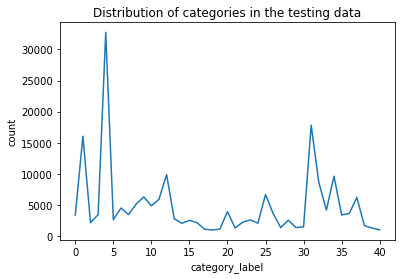

In [22]:
'''
Check categories distribution of the testing data
'''
tempY = [label(ele) for ele in testingCategories]
total_counts = [tempY.count(i) for i in range(max(tempY)+1)]
plt.plot(total_counts)
plt.title("Distribution of categories in the testing data")
plt.ylabel("count")
plt.xlabel("category_label")

In [23]:
'''
vectorize the testing headlines and cluster
'''
testX = LSA.transform(vectorizer.transform(testingDf['headline'].values))

tested = kmeans.predict(testX)

def num(arr):
    unique, counts = np.unique(arr, return_counts=True)
    return counts

num(tested)

array([  2227,   5374,   7992,   1222,    636,   2052, 180983,    367],
      dtype=int64)

In [20]:
'''
Distribution of predicted clusters
'''

def num(arr):
    unique, counts = np.unique(arr, return_counts=True)
    return counts

clusters = kmeans.predict(headline_vectors)
num(clusters)

array([  11594,   27370,   30972,   14494,    9498,   41216, 1078569,
         12545], dtype=int64)

In [29]:
#Summarize results
resultsDf = headlinesDf
resultsDf['cluster'] = kmeans.predict(headline_vectors)
resultsDf.tail()

headline_text  cluster
publish_date                                                            
20201231      what abc readers learned from 2020 looking bac...        6
20201231      what are the south african and uk variants of ...        4
20201231      what victorias coronavirus restrictions mean f...        2
20201231      whats life like as an american doctor during c...        6
20201231      womens shed canberra reskilling unemployed pan...        6

Top-5 categories in this cluster: ('wellness', 'politics', 'healthy living', 'impact', 'business')


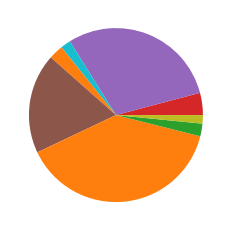

Top-5 categories in this cluster: ('politics', 'entertainment', 'the worldpost', 'wellness', 'crime')


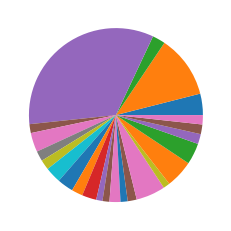

Top-5 categories in this cluster: ('politics', 'entertainment', 'style & beauty', 'wellness', 'travel')


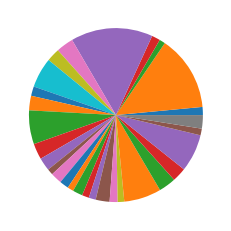

Top-5 categories in this cluster: ('politics', 'queer voices', 'parenting', 'wellness', 'entertainment')


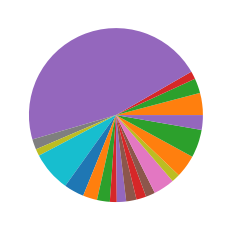

Top-5 categories in this cluster: ('politics', 'the worldpost', 'travel', 'world news', 'worldpost')


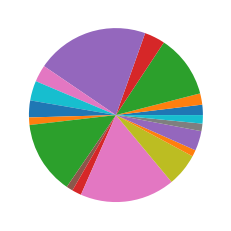

Top-5 categories in this cluster: ('crime', 'politics', 'weird news', 'queer voices', 'entertainment')


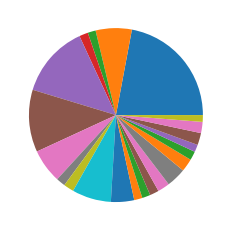

Top-5 categories in this cluster: ('politics', 'wellness', 'entertainment', 'travel', 'style & beauty')


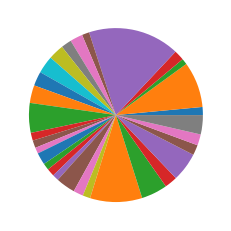

Top-5 categories in this cluster: ('crime', 'politics', 'queer voices', 'black voices', 'entertainment')


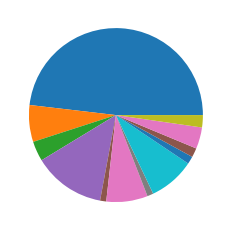

In [39]:
'''
Report of clustering in the testing data set
Check distribution of categories in each cluster
'''
def num(arr): #count of categories
    unique, counts = np.unique(arr, return_counts=True)
    return counts


records = [[] for i in range(8)] 
#Record category counts for each cluster

for i in range(len(tested)):
    #original label: testingY[i]
    #cluster: tested[i]
    records[tested[i]] += [testingY[i]]
    
def highestn(lst, n=5): #Only work for n=5 anyway XD
    inds = [i for i in range(len(lst))]
    temp = []
    for i in range(len(lst)):
        temp += [[lst[i], i]]
    ordered = sorted(temp)
    return label_str[ordered[-1][1]].lower(), label_str[ordered[-2][1]].lower(), label_str[ordered[-3][1]].lower(), label_str[ordered[-4][1]].lower(), label_str[ordered[-5][1]].lower()

for record in records:
    xx = np.bincount(record)
    xx[xx<(sum(xx)/100)] = 0
    
    print("Top-5 categories in this cluster:",highestn(xx))
    plt.pie(xx)
    plt.show() 

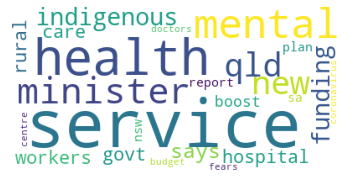

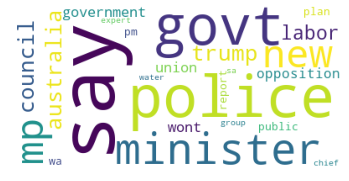

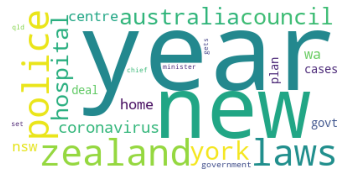

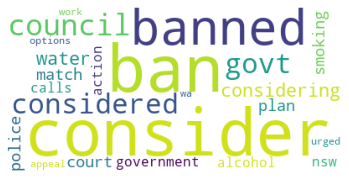

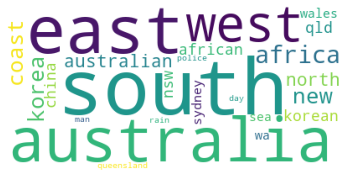

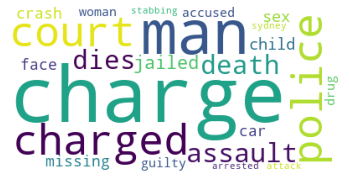

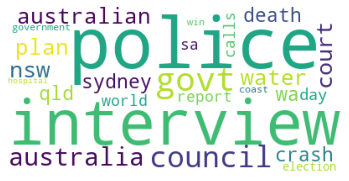

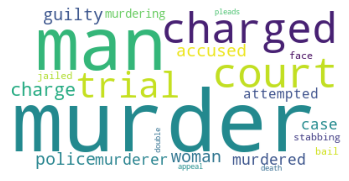

In [40]:
# Define helper functions 
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

def plotWC(names,weights=None): 
    #plot WordCloud from given name list and frequency list
    #most important first
    if weights ==None:
        weights = [(i//5)*5 for i in range(29,-1,-1)]
    weights = weights[:len(names)]
    text = ""
    for i in range(len(weights)):
        for _ in range(weights[i]):
            text = text + names[i] + " "
    text = text[:-1]
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", collocations=False, max_words=50).generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

count_vectorizer = CountVectorizer(stop_words='english')

for i in range(len(records)):
    hls = resultsDf['headline_text'][resultsDf.cluster == i]
    words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=hls)
    plotWC(words)
    


In [ ]:
'''The end~~'''